cluster_0.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30009 entries, 0 to 30008
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 2.0 GB
None
---before outlier---
ShapiroResult(statistic=0.7892539501190186, pvalue=0.0)
--after outlier--
ShapiroResult(statistic=0.9952356815338135, pvalue=2.9535053523167384e-29)
--fitting a distribution --


C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


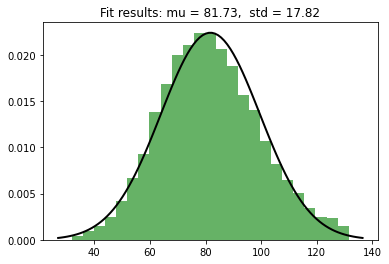

cluster_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27333 entries, 0 to 27332
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 1.8 GB
None
---before outlier---
ShapiroResult(statistic=0.5603487491607666, pvalue=0.0)
--after outlier--
ShapiroResult(statistic=0.9951194524765015, pvalue=2.065358364934879e-28)
--fitting a distribution --


C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


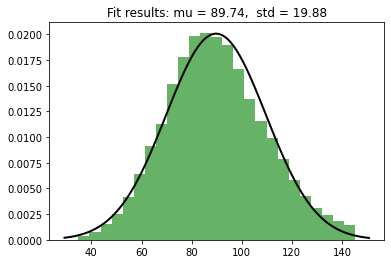

cluster_2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 540.1 MB
None
---before outlier---
ShapiroResult(statistic=0.8660327196121216, pvalue=0.0)
--after outlier--
ShapiroResult(statistic=0.9965173006057739, pvalue=8.836179943121081e-13)
--fitting a distribution --


C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


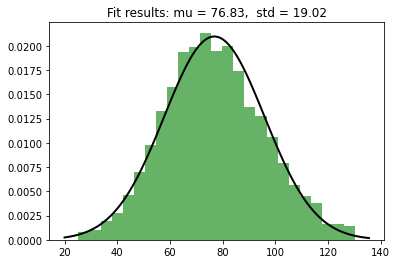

cluster_3.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9068 entries, 0 to 9067
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 606.0 MB
None
---before outlier---
ShapiroResult(statistic=0.6095676422119141, pvalue=0.0)
--after outlier--
ShapiroResult(statistic=0.9942872524261475, pvalue=2.4481938444688546e-18)
--fitting a distribution --


C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


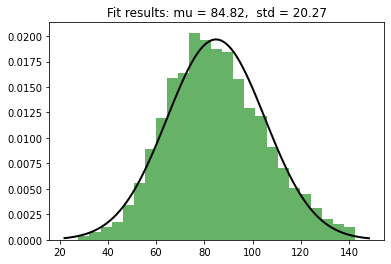

In [93]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import norm
import pylab


def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    return df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

files = ['cluster_{}.csv'.format(i) for i in range(0,4)]
mu_values = []

for file in files:
    print(file)
    df = pd.read_csv(file)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    print(df.info())
    
    df = df.interpolate(method='linear', limit_direction='forward', axis=0) #filling missing values
    df = df.fillna(0) # replacing nan-values with zero
    
    print("---before outlier---")
    row_sums = df.sum(axis=1) # getting row sums, since each row is a 8760
    row_sums.to_csv(file[0:9]+"_"+".csv")
    print(shapiro(row_sums.values))
    
    sqrt_row_sums = numpy.sqrt(row_sums)
    #stats.probplot(sqrt_row_sums.values, dist = "norm", plot = pylab)
    #pylab.show()

    print("--after outlier--")
    outlier_removed = remove_outlier_IQR(sqrt_row_sums)
    print(shapiro(outlier_removed.values))
    
    #stats.probplot(outlier_removed.values, dist = "norm", plot = pylab)
    #pylab.show()
    
    print("--fitting a distribution --")
    # Fit a normal distribution to the data:
    mu, std = norm.fit(outlier_removed.values)
    mu_values.append(mu)

    # Plot the histogram.
    plt.hist(outlier_removed.values, bins=25, density=True, alpha=0.6, color='g')
    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)
    plt.show()

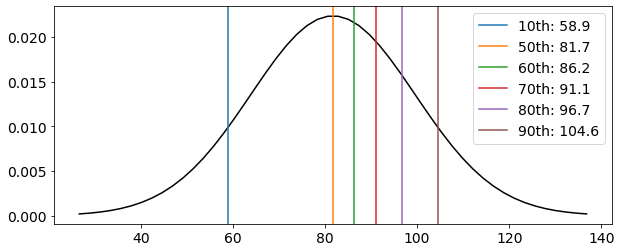

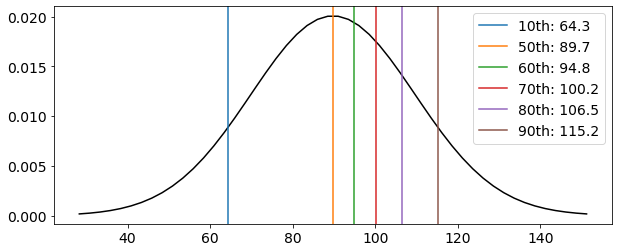

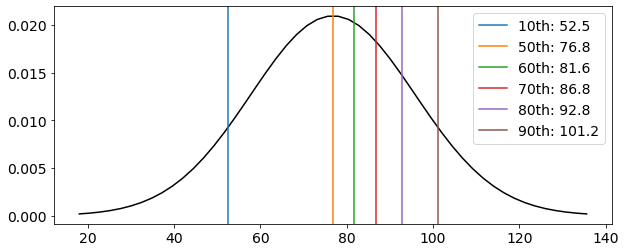

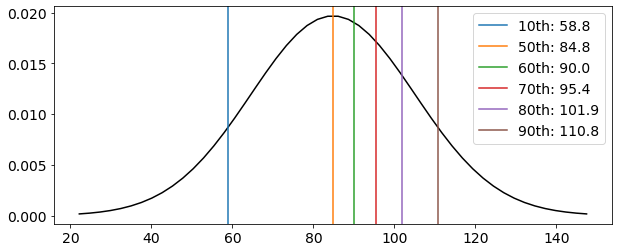

In [193]:
#https://stackoverflow.com/questions/65988123/how-to-compute-the-percentiles-from-a-normal-distribution-in-python
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt


mu = [81.73, 89.74, 76.83, 84.82]
sigma = [17.82, 19.88, 19.02, 20.27]

for i in range(4):
    # define the normal distribution and PDF
    dist = sps.norm(loc=mu[i], scale=sigma[i])
    x = np.linspace(dist.ppf(.001), dist.ppf(.999))
    y = dist.pdf(x)

    # calculate PPFs
    ppfs = {}
    for ppf in [.1, .5, .6, .7, .8, .9]:
        p = dist.ppf(ppf)
        ppfs.update({ppf*100: p})

    # plot results
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.plot(x, y, color='k')
    for i, ppf in enumerate(ppfs):
        ax.axvline(ppfs[ppf], color=f'C{i}', label=f'{ppf:.0f}th: {ppfs[ppf]:.1f}')
    ax.legend()
    plt.show()

In [176]:
pcntile_80 = [96.7, 106.5, 92.8, 101.9]

In [201]:
pcntile_60 = [86.2,94.8,81.6,90]
pcntile_90 = [104.6,115.2,101.2,110.8]

In [154]:
type(ppfs)

dict

In [157]:
pd.DataFrame(ppfs, index= [0])

,10.0,50.0,80.0,90.0
0,58.84295,84.82,101.879662,110.79705


In [103]:
mu_values

[81.72901438611422, 89.73593366756255, 76.8293067046773, 84.8230695078433]

In [104]:
cluster_mean_kwh_annual = [i**2 for i in mu_values] 

In [101]:
for file in files:
    print(file)
    df = pd.read_csv(file)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    print(df.info())
    
    df = df.interpolate(method='linear', limit_direction='forward', axis=0) #filling missing values
    df = df.fillna(0) # replacing nan-values with zero
    
    row_sums = df.sum(axis=1) # getting row sums, since each row is a 8760
    row_sums.to_csv(file[0:9]+"_rowsums_"+".csv")

cluster_0.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30009 entries, 0 to 30008
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 2.0 GB
None
---before outlier---
cluster_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27333 entries, 0 to 27332
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 1.8 GB
None
---before outlier---
cluster_2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 540.1 MB
None
---before outlier---
cluster_3.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9068 entries, 0 to 9067
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 606.0 MB
None
---before outlier---


In [102]:
for file in files:
    print(file)
    df = pd.read_csv(file)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    print(df.info())
    
    df = df.interpolate(method='linear', limit_direction='forward', axis=0) #filling missing values
    df = df.fillna(0) # replacing nan-values with zero
    print(df.info())
    df.to_csv(file[0:9]+"_noMissingValue_"+".csv")

cluster_0.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30009 entries, 0 to 30008
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 2.0 GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30009 entries, 0 to 30008
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 2.0 GB
None
cluster_1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27333 entries, 0 to 27332
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 1.8 GB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27333 entries, 0 to 27332
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 1.8 GB
None
cluster_2.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 540.1 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8081 entries, 0 to 8080
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 540.1 MB
None
cluster_3.csv
<c

finding out the associated 8760 by searching

In [108]:
mu_values = [81.72901438611422, 89.73593366756255, 76.8293067046773, 84.8230695078433]
cluster_mean_kwh_annual = [i**2 for i in mu_values] 
row_sum_files = ["cluster_{}_rowsums_.csv".format(i) for i in range(0,4)]
temp = 0
print("index,actual, distribution_mean")
for sum_file in row_sum_files:
    data_frame = pd.read_csv(sum_file)
    a = data_frame.iloc[:,1].values
    index_of_mean, value_closest_to_mean =  min(enumerate(a), key=lambda x: abs(x[1]-cluster_mean_kwh_annual[temp]))
    print(index_of_mean,",", value_closest_to_mean,",", cluster_mean_kwh_annual[temp])
    loadshape = pd.read_csv("cluster_{}_noMissingValue_.csv")
    temp = temp+1

index,actual, distribution_mean
3757 , 6679.436847826087 , 6679.631792525664
24717 , 8052.5914722222215 , 8052.537791189186
3511 , 5902.663916729322 , 5902.742368721371
8779 , 7195.059702919947 , 7194.953120732416


In [119]:
loadshape_repo = ["cluster_{}_noMissingValue_.csv".format(i) for i in range(0,4)]
indices = [3757, 24717, 3511, 8779]
for i in range(4):
    df = pd.read_csv(loadshape_repo[i])
    df.iloc[indices[i]][1:].to_csv("representative_loadshape_for_cluster_{}_.csv".format(i))

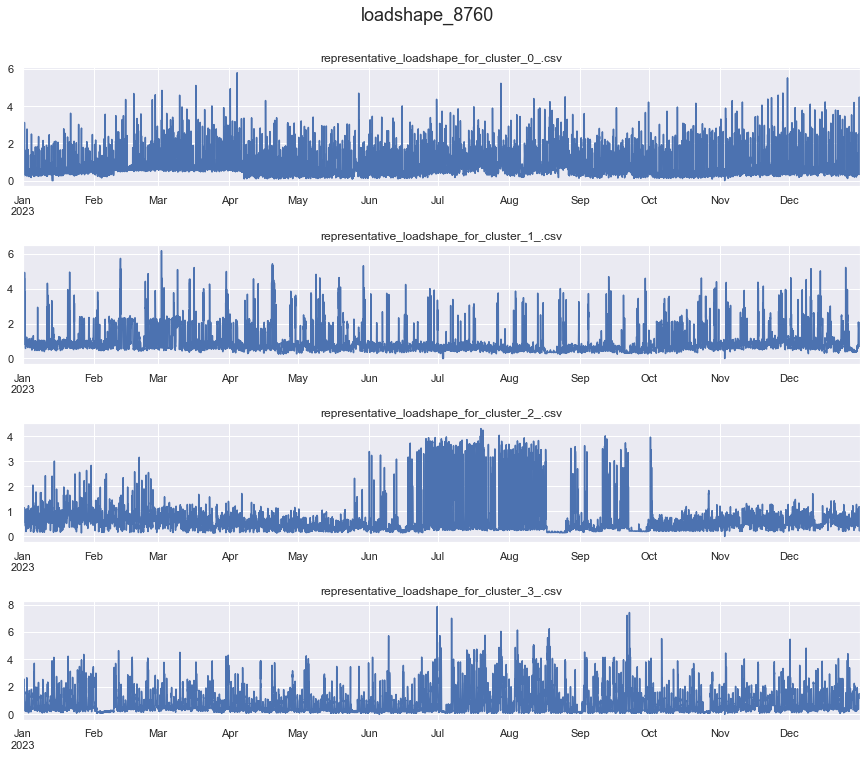

In [186]:
loadshape_repo = ["representative_loadshape_for_cluster_{}_.csv".format(i) for i in range(0,4)]
#fig, axs = plt.subplots(4,1, figsize=(15, 6), facecolor='w', edgecolor='k')

dti = pd.date_range(pd.to_datetime(datetime.datetime(2023,1,1)), periods=8760, freq="H", tz = 'US/Central')
df['Datetime'] = dti

# define subplot grid
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("loadshape_8760", fontsize=18, y=0.95)

# loop through tickers and axes
for file, ax in zip(loadshape_repo, axs.ravel()):
    df = pd.read_csv(file)
    df = df.iloc[:,1]
    df = pd.DataFrame(df.values, columns = [file])
    df.index = dti
    df.to_csv("final_files/"+file)
    # filter df for ticker and plot on specified axes
    df.plot(ax=ax)

    # chart formatting
    ax.set_title(file)
    ax.get_legend().remove()
    ax.set_xlabel("")

plt.show()

In [122]:
import matplotlib.pyplot as plt

In [121]:
mu_values = [81.72901438611422, 89.73593366756255, 76.8293067046773, 84.8230695078433]
cluster_mean_kwh_annual = [i**2 for i in mu_values] 
row_sum_files = ["cluster_{}_rowsums_.csv".format(i) for i in range(0,4)]
temp = 0
print("no of customers over mean")
for file in row_sum_files:
    data_frame = pd.read_csv(file)
    print(sum(i>cluster_mean_kwh_annual[temp] for i in data_frame.iloc[:,1].values)/len(data_frame.iloc[:,1].values)*100, "%")
    temp = temp+1

no of customers over mean
48.59208903995468 %
48.937182160758056 %
49.115208513797796 %
48.290692545213936 %


In [119]:
len(data_frame.iloc[:,1].values)

9068

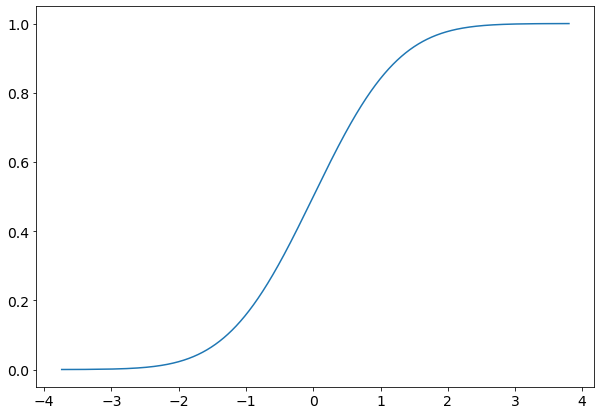

In [145]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

x = np.random.randn(10000) # generate samples from normal distribution (discrete data)
norm_cdf = scipy.stats.norm.cdf(x) # calculate the cdf - also discrete

# plot the cdf
sns.lineplot(x=x, y=norm_cdf)
plt.show()

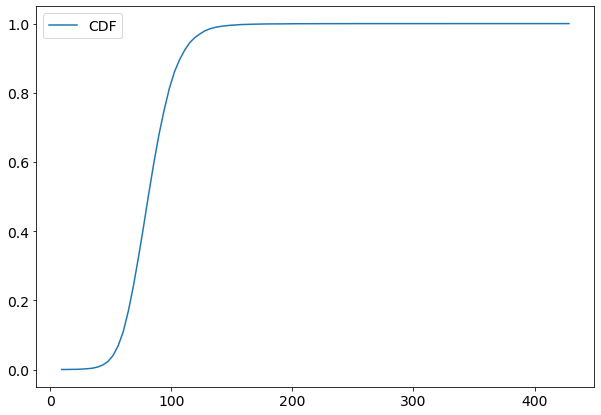

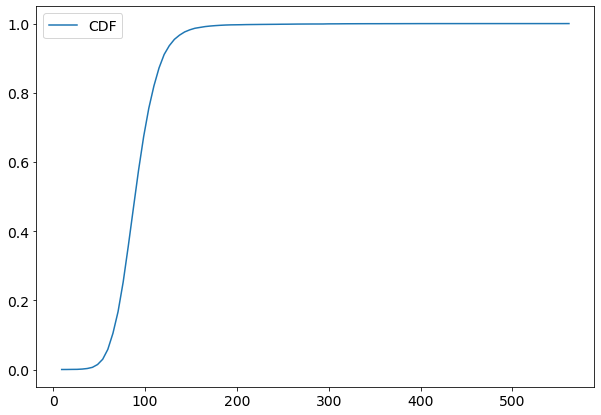

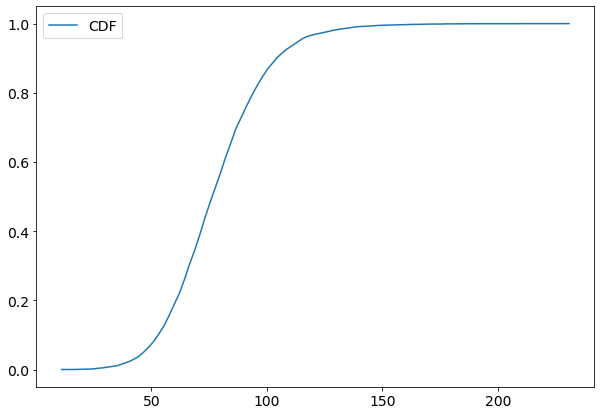

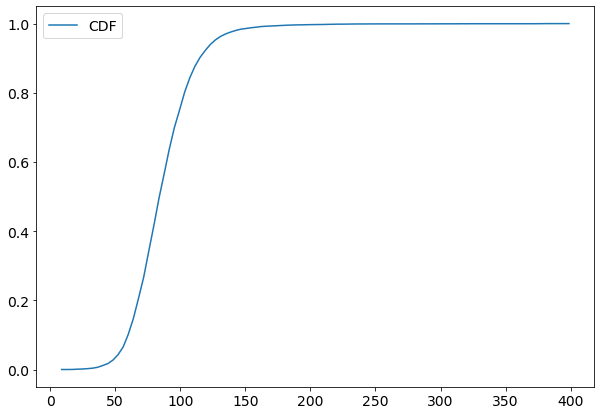

In [146]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

row_sum_files = ["cluster_{}_rowsums_.csv".format(i) for i in range(0,4)]
temp = 0

for file in row_sum_files:
    data_frame = pd.read_csv(file)
    data = np.sqrt(data_frame.iloc[:,1].values)
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.legend()
    plt.show()

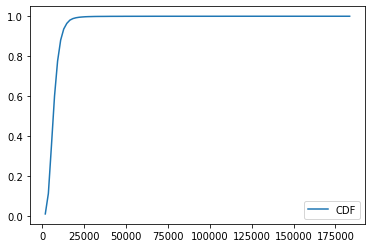

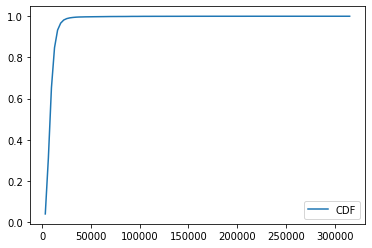

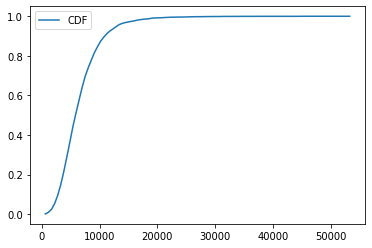

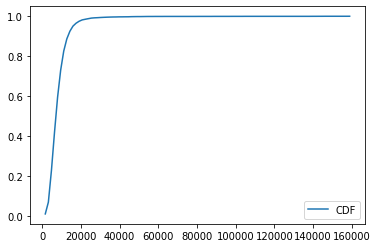

In [133]:
import numpy as np
import matplotlib.pyplot as plt

row_sum_files = ["cluster_{}_rowsums_.csv".format(i) for i in range(0,4)]
temp = 0

for file in row_sum_files:
    data_frame = pd.read_csv(file)
    data = (data_frame.iloc[:,1].values)
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.legend()
    plt.show()

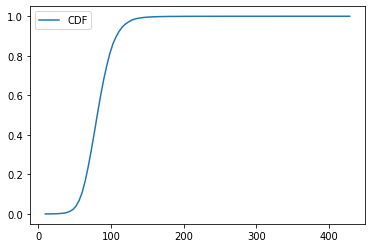

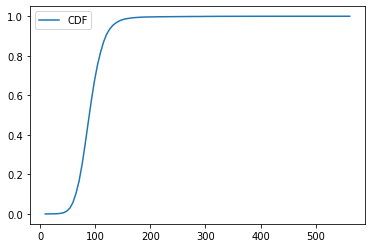

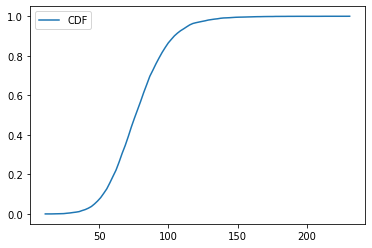

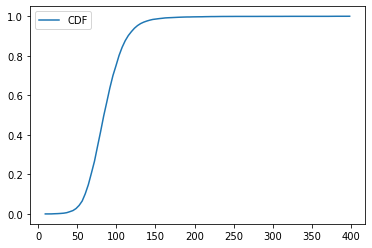

In [132]:
import numpy as np
import matplotlib.pyplot as plt

row_sum_files = ["cluster_{}_rowsums_.csv".format(i) for i in range(0,4)]
temp = 0

for file in row_sum_files:
    data_frame = pd.read_csv(file)
    data = np.sqrt(data_frame.iloc[:,1].values)
    count, bins_count = np.histogram(data, bins=100)
    pdf = count / sum(count)
    cdf = np.cumsum(pdf)
    plt.plot(bins_count[1:], cdf, label="CDF")
    plt.legend()
    plt.show()

In [204]:
mu_values =  [81.7,  89.7,  76.8,  84.8] #pcntile_50
pcntile_60 = [86.2,  94.8,  81.6,  90  ]
pcntile_80 = [96.7,  106.5, 92.8,  101.9]
pcntile_90 = [104.6, 115.2, 101.2, 110.8]

aggregation_start = [81.7, 89.7,  81.6,  84.8] # taking 50th for cluster #0 and #1, 60th for clust 2, 50th for cluster#3] 
aggregation_end =   [96.7, 106.5, 101.2, 101.9] # taking 80th for clster #0 and #1, 90th for #2, 80th for #3]

lower_kwh_annual = [i**2 for i in aggregation_start]
upper_kwh_annual = [i**2 for i in aggregation_end ]

row_sum_files = ["cluster_{}_rowsums_.csv".format(i) for i in range(0,4)]

holders = []
temp = 0

for file in row_sum_files:
    data_frame = pd.read_csv(file)
    #data_frame= data_frame.iloc[:,1]
    data_frame["delta"] = data_frame.iloc[:,1]-lower_kwh_annual[temp]
    print(lower_kwh_annual[temp])
    #data_frame[data_frame["delta"]<10 & data_frame["delta"]>-10]
    df = data_frame[data_frame["delta"]>lower_kwh_annual[temp]]
    df = df[df["delta"]<=upper_kwh_annual[temp]]
    holders.append(df.index.values)
    temp = temp+1
    
holders

6674.89
8046.09
6658.5599999999995
7191.04


[array([   60,   100,   109,   140,   152,   155,   189,   248,   338,
          341,   351,   406,   508,   533,   603,   654,   682,   780,
          782,   816,   839,   884,   897,   898,   913,   918,   934,
          944,   966,   973,  1044,  1076,  1077,  1094,  1116,  1121,
         1154,  1207,  1270,  1274,  1303,  1320,  1321,  1325,  1346,
         1447,  1483,  1503,  1516,  1565,  1566,  1613,  1688,  1704,
         1802,  1835,  1845,  1865,  1897,  1913,  1924,  1926,  1972,
         1993,  2022,  2114,  2117,  2140,  2175,  2329,  2340,  2344,
         2362,  2364,  2365,  2385,  2415,  2569,  2577,  2650,  2691,
         2732,  2792,  2808,  2864,  2915,  2916,  3053,  3095,  3116,
         3179,  3185,  3190,  3192,  3219,  3225,  3235,  3239,  3301,
         3383,  3436,  3484,  3517,  3525,  3527,  3539,  3584,  3592,
         3603,  3634,  3686,  3731,  3865,  3890,  3955,  3971,  3993,
         4006,  4041,  4048,  4116,  4127,  4186,  4207,  4232,  4250,
      

In [205]:
temp

4

In [206]:
loadshape_repo = ["cluster_{}_noMissingValue_.csv".format(i) for i in range(0,4)]
for i in range(4):
    dummy = []
    df = pd.read_csv(loadshape_repo[i])
    for x in range(0, len(holders[i])): 
        d = df.iloc[holders[i][x]][1:]
        dummy.append(d.values)
    df_1 = pd.DataFrame(dummy)
    df_1.mean().to_csv("final_files/v10/representative_loadshape_for_cluster_{}_v10.csv".format(i))

final_files/v10/representative_loadshape_for_cluster_0_v10.csv
final_files/v10/representative_loadshape_for_cluster_1_v10.csv
final_files/v10/representative_loadshape_for_cluster_2_v10.csv
final_files/v10/representative_loadshape_for_cluster_3_v10.csv


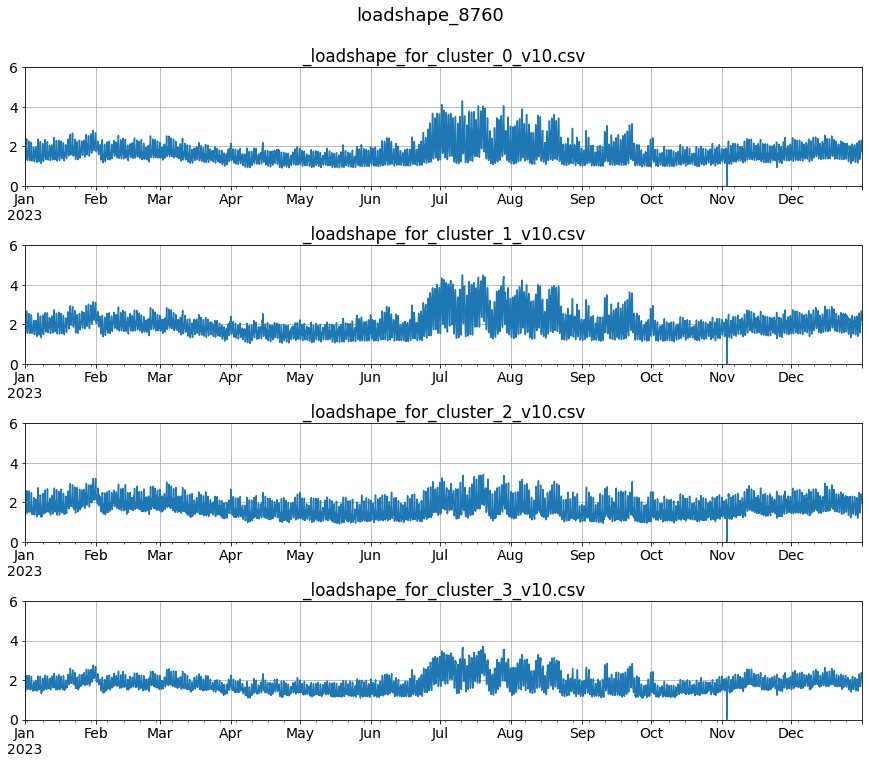

final_files/v10/representative_loadshape_for_cluster_0_v10.csv
final_files/v10/representative_loadshape_for_cluster_1_v10.csv
final_files/v10/representative_loadshape_for_cluster_2_v10.csv
final_files/v10/representative_loadshape_for_cluster_3_v10.csv


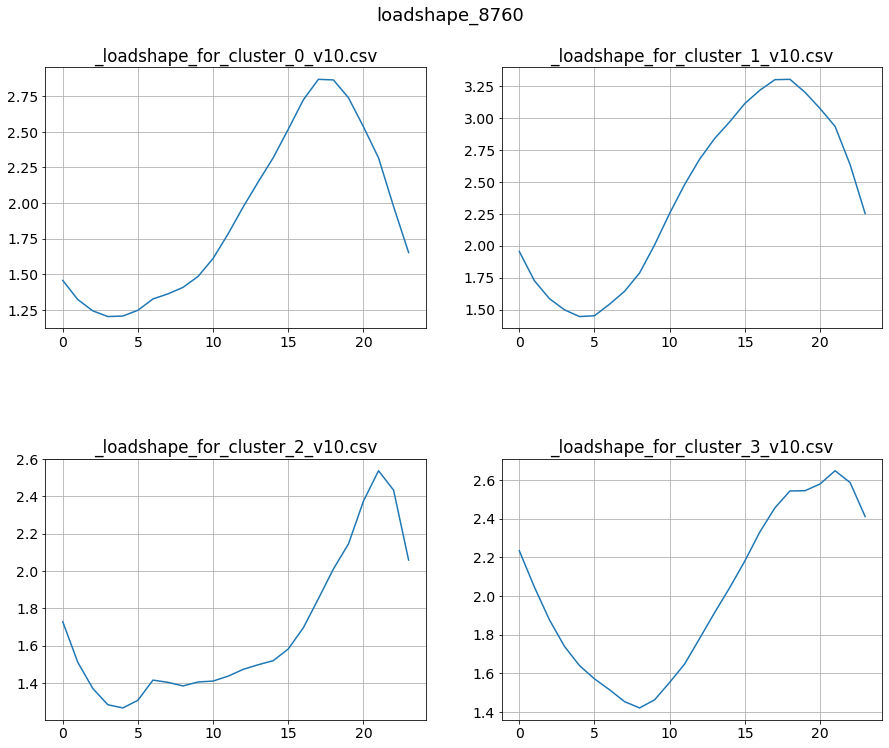

In [272]:
def plot_8760_loadshapes(folder_name):
    
    loadshape_repo = ["/representative_loadshape_for_cluster_{}_".format(i) for i in range(0,4)]
    loadshape_repo= [str("final_files/"+folder_name+loadshape_repo[i]+folder_name+".csv") for i in range(0,4)]
    #fig, axs = plt.subplots(4,1, figsize=(15, 6), facecolor='w', edgecolor='k')

    dti = pd.date_range(pd.to_datetime(datetime.datetime(2023,1,1)), periods=8760, freq="H", tz = 'US/Central')


    # define subplot grid
    fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("loadshape_8760", fontsize=18, y=0.95)

    # loop through tickers and axes
    for file, ax in zip(loadshape_repo, axs.ravel()):
        df = pd.read_csv(file)
        print(file)
        df = df.iloc[:,1]
        df = pd.DataFrame(df.values, columns = [file])
        df.index = dti
        #df.to_csv("final_files/v2/"+file)
        # filter df for ticker and plot on specified axes
        df.plot(ax=ax)

        # chart formatting
        ax.set_title(file[30:])
        ax.get_legend().remove()
        ax.set_xlabel("")
        ax.set_ylim(bottom = 0, top = 6)
        ax.grid()

    plt.show()
    

def plot_summer_loadcurve(folder_name):
    loadshape_repo = ["/representative_loadshape_for_cluster_{}_".format(i) for i in range(0,4)]
    loadshape_repo= [str("final_files/"+folder_name+loadshape_repo[i]+folder_name+".csv") for i in range(0,4)]
    dti = pd.date_range(pd.to_datetime(datetime.datetime(2023,1,1)), periods=8760, freq="H", tz = 'US/Central')
    # define subplot grid
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("loadshape_8760", fontsize=18, y=0.95)

    # loop through tickers and axes
    for file, ax in zip(loadshape_repo, axs.ravel()):
        df = pd.read_csv(file)
        print(file)
        df = df.iloc[:,1]
        df = pd.DataFrame(df.values, columns = [file])
        df.index = dti
        df['month'] = df.index.month
        df['hour'] = df.index.hour
        df = df[df.month==8]
        dummy = df.groupby(['hour']).mean()
        dummy.iloc[:,0].plot(ax= ax)
        #df.to_csv("final_files/validation/"+file[len(file)-16:len(file)])

        # chart formatting
        ax.set_title(file[30:])
        #ax.get_legend().remove()
        ax.set_xlabel("")
        ax.grid()

    
target = 'v10'
plot_8760_loadshapes(folder_name = target)
plot_summer_loadcurve(folder_name = target)

In [214]:
def summary_of_8760_loadshapes(folder_name):
    
    loadshape_repo = ["/representative_loadshape_for_cluster_{}_".format(i) for i in range(0,4)]
    loadshape_repo= [str("final_files/"+folder_name+loadshape_repo[i]+folder_name+".csv") for i in range(0,4)]

    # loop through tickers and axes
    for file in loadshape_repo:
        df = pd.read_csv(file)
        df = df.iloc[:,1]
        df = pd.DataFrame(df.values, columns = [file])
        print(df.sum())
    
summary_of_8760_loadshapes(folder_name = 'v10')

final_files/v10/representative_loadshape_for_cluster_0_v10.csv    14525.218337
dtype: float64
final_files/v10/representative_loadshape_for_cluster_1_v10.csv    17476.079796
dtype: float64
final_files/v10/representative_loadshape_for_cluster_2_v10.csv    14792.785721
dtype: float64
final_files/v10/representative_loadshape_for_cluster_3_v10.csv    15699.270616
dtype: float64


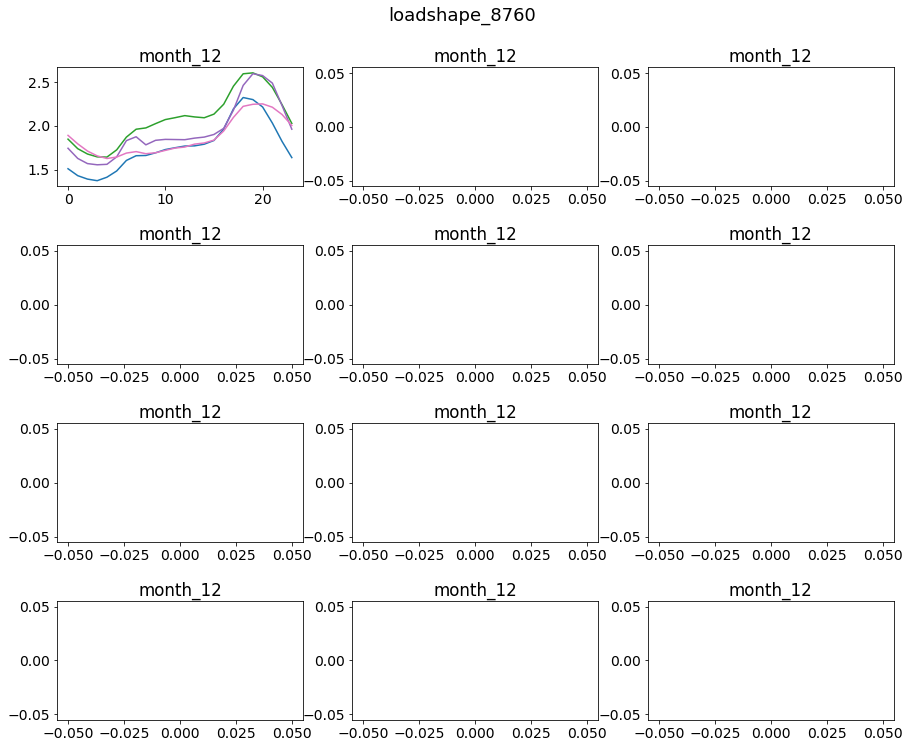

In [282]:
def plot_monthly_loadcurve(folder_name):
    loadshape_repo = ["/representative_loadshape_for_cluster_{}_".format(i) for i in range(0,4)]
    loadshape_repo= [str("final_files/"+folder_name+loadshape_repo[i]+folder_name+".csv") for i in range(0,4)]
    dti = pd.date_range(pd.to_datetime(datetime.datetime(2023,1,1)), periods=8760, freq="H", tz = 'US/Central')
    # define subplot grid
    fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    fig.suptitle("loadshape_8760", fontsize=18, y=0.95)

    # loop through tickers and axes
    
    for file in loadshape_repo:
        df = pd.read_csv(file)
        #print(file)
        df = df.iloc[:,1]
        df = pd.DataFrame(df.values, columns = [file])
        df.index = dti
        df['month'] = df.index.month
        df['hour'] = df.index.hour
        for ax in axs.ravel():
            for x in range(1,13):
                df = df[df.month==x]
                dummy = df.groupby(['hour']).mean()
                dummy.iloc[:,0].plot(ax= ax)
                #df.to_csv("final_files/validation/"+file[len(file)-16:len(file)])

                # chart formatting
                ax.set_title("month_"+str(x))
                #ax.get_legend().remove()
                ax.set_xlabel("")
                #ax.grid()
plot_monthly_loadcurve(folder_name= 'v10')

In [219]:
folder = 'v10'
loadshape_repo = ["/representative_loadshape_for_cluster_{}_".format(i) for i in range(0,4)]
loadshape_repo= [str("final_files/"+folder_name+loadshape_repo[i]+folder_name+".csv") for i in range(0,4)]
dti = pd.date_range(pd.to_datetime(datetime.datetime(2023,1,1)), periods=8760, freq="H", tz = 'US/Central')
all_data = []
k = 0
for i in loadshape_repo:
    df = pd.read_csv(i)
    df = df.iloc[:,1:]
    df.columns = ['site_load']
    df['datetime'] = dti
    df.index = df['datetime']
    df['date'] = pd.DatetimeIndex(df['datetime']).date
    dummy1 = df.groupby("date").sum().reset_index()
    dummy1 = dummy1.rename(columns = {"site_load":"kwh_cluster_"+str(k)})
    dummy2 = df.groupby("date").max().reset_index()
    dummy2 = dummy2.rename(columns = {"site_load":"kw_cluster_"+str(k)})
    dummy = pd.merge(dummy1,dummy2, how = 'left', on = "date" )
    all_data.append(dummy)
    k= k+1

d= pd.concat(all_data, axis=1)
d.to_csv("v10_all_cluster_dailyKWH_dailypeakKW.csv")

In [271]:
df = pd.read_csv("v10_all_cluster_dailyKWH_dailypeakKW.csv")
df = df.iloc[:,1:]
for i in range(0,4):
    kwh_column_name = 'kwh_cluster_{}'.format(i)
    kw_column_name = 'kw_cluster_{}'.format(i)
    column_name_1 = 'cluster_{}_daily_kwh_coverage'.format(i)
    df[column_name_1] = 30/df[kwh_column_name]
    column_name_2 = 'cluster_{}_daily_kw_coverage'.format(i)
    df[column_name_2] = df[kw_column_name]<5
    df[column_name_2] = df[column_name_2].astype(int)

def describe(df, stats):
    d = df.describe()
    return d.append(df.reindex(d.columns, axis = 1).agg(stats))
d = describe(df, ['sum'])
d.T[8:][["mean","sum"]]

,mean,sum
cluster_0_daily_kwh_coverage,0.776168,283.301406
cluster_0_daily_kw_coverage,1.000000,365.000000
cluster_1_daily_kwh_coverage,0.648418,236.672484
cluster_1_daily_kw_coverage,1.000000,365.000000
cluster_2_daily_kwh_coverage,0.867724,316.719269
cluster_2_daily_kw_coverage,1.000000,365.000000
cluster_3_daily_kwh_coverage,0.717139,261.755778
cluster_3_daily_kw_coverage,1.000000,365.000000


In [43]:
import datetime

experimentation starts

In [2]:
import pandas as pd
df1 = pd.read_csv("cluster_0.csv")
df1 = df1.drop("Unnamed: 0",axis=1)
#df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30009 entries, 0 to 30008
Columns: 8760 entries, 0 to 8759
dtypes: float64(8760)
memory usage: 2.0 GB


normality test

In [7]:
df1 = df1.interpolate(method='linear', limit_direction='forward', axis=0)
df1 = df1.fillna(0) # replacing nan-values with zero

In [16]:
row_sums = df1.sum(axis=1)
row_sums

0         5949.126000
1         6301.624000
2        29448.707000
3         4195.124000
4         7641.522000
             ...     
30004     4473.761290
30005     5325.887931
30006     5004.810573
30007     6288.088714
30008     5735.613000
Length: 30009, dtype: float64

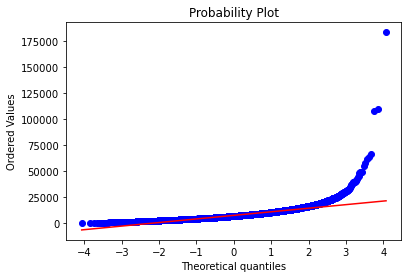

In [28]:
import numpy as np
import pylab
import scipy.stats as stats
stats.probplot(row_sums.values, dist = "norm", plot = pylab)
pylab.show()

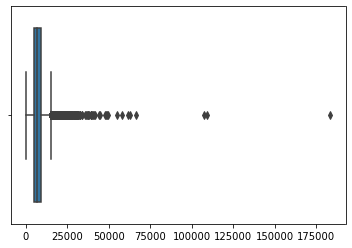

In [44]:
import seaborn as sns
ax = sns.boxplot(x = row_sums.values)

In [31]:
#calculate interquartile range 
q3, q1 = np.percentile(row_sums.values, [75 ,25])
iqr = q3 - q1
iqr

4067.828436774709

In [32]:
def remove_outlier_IQR(df):
    Q1=df.quantile(0.25)
    Q3=df.quantile(0.75)
    IQR=Q3-Q1
    return df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR)))]

outlier_removed = remove_outlier_IQR(row_sums)
outlier_removed

0        5949.126000
1        6301.624000
3        4195.124000
4        7641.522000
5        5224.389500
            ...     
30004    4473.761290
30005    5325.887931
30006    5004.810573
30007    6288.088714
30008    5735.613000
Length: 29015, dtype: float64

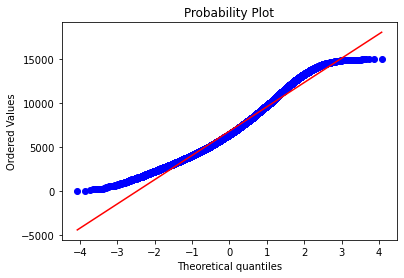

In [33]:
stats.probplot(outlier_removed.values, dist = "norm", plot = pylab)
pylab.show()

C:\Users\54651\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

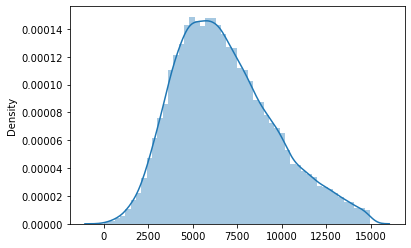

In [37]:
sns.distplot(outlier_removed.values)

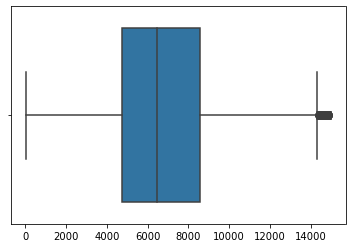

In [45]:
import seaborn as sns
ax = sns.boxplot(x = outlier_removed.values)

In [46]:
#shapiro-wilk test
from scipy.stats import shapiro
shapiro(row_sums.values)

C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.7892539501190186, pvalue=0.0)

In [47]:
shapiro(outlier_removed.values)

ShapiroResult(statistic=0.9765517711639404, pvalue=0.0)

In [56]:
shapiro(numpy.log(outlier_removed.values))

C:\Users\54651\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9627161026000977, pvalue=0.0)

In [57]:
shapiro(numpy.sqrt(outlier_removed.values))

ShapiroResult(statistic=0.9969682097434998, pvalue=2.3181911478375198e-23)

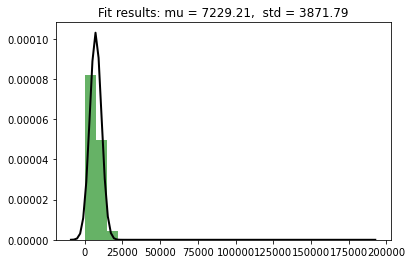

In [48]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


# Generate some data for this demonstration.
data = row_sums.values


# Fit a normal distribution to the data:
mu, std = norm.fit(data)

# Plot the histogram.
plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

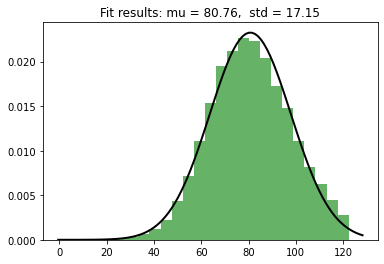

In [58]:
# Generate some data for this demonstration.
data = outlier_removed.values

# Fit a normal distribution to the data:
mu, std = norm.fit(numpy.sqrt(data))

# Plot the histogram.
plt.hist(numpy.sqrt(data), bins=25, density=True, alpha=0.6, color='g')

# Plot the PDF.
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

linear interpolation + averaging

<AxesSubplot:>

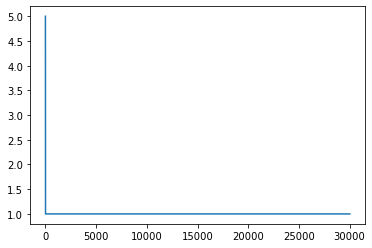

In [4]:
df1.isnull().sum(axis=1).plot()

In [5]:
df1 = df1.fillna(0) # replacing nan-values with zero
df1.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
30004    0
30005    0
30006    0
30007    0
30008    0
Length: 30009, dtype: int64

<AxesSubplot:>

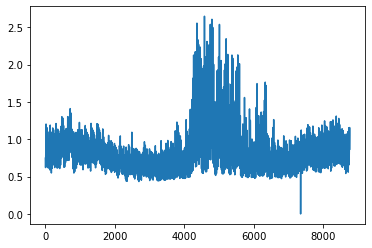

In [6]:
df1.mean().plot()

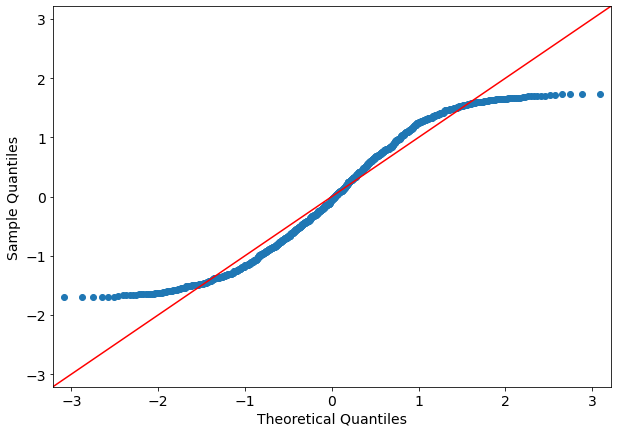

In [142]:
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('font', size=14)
from scipy.stats import norm, uniform
import numpy as np
np.random.seed(0)
x = np.random.uniform(low = 1000, high= 2000,size = 1000)
qqplot(x,norm,fit=True,line="45")
plt.show()

zero replacement avergaing